# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Ofir 6987
# student 2: Benny 6309
# student 3: Ravit 6491

## Part 2 - Initial Preparations 
You could add as many code cells as needed

### חלק 2 - הכנת הנתונים (EDA - ניתוח נתונים ראשוני)

בשלב הזה טענו את הקבצים וביצענו ניתוח ראשוני של הנתונים (Exploratory Data Analysis - EDA) כדי להבין את מבנה הדאטה והקשרים בין המשתנים השונים. ה-EDA כלל:

1.  **סטטיסטיקות תיאוריות**: בדקנו נתונים סטטיסטיים חשובים כמו ממוצע, חציון, מינימום ומקסימום עבור כל עמודה בנתונים.
2.  **ויזואליזציות**:
    -   **Scatterplot**: הצגנו קשר בין שני משתנים וניסינו להבין את הקורלציה ביניהם.
    -   **Heatmap**: הצגנו את מטריצת הקורלציות בין כל המשתנים, כדי לזהות משתנים עם קורלציה גבוהה זה עם זה ועם משתנה המטרה (MedHouseVal).

המטרה של ה-EDA היא לתת תמונה ראשונית על הנתונים, לזהות דפוסים, חריגים או קשרים בין משתנים.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


pd.set_option('display.max_colwidth', 100)  # You can adjust the value as needed


In [3]:
trainset = pd.read_csv('housing_train.csv')
testset = pd.read_csv('housing_test.csv')
print("Trainset:")
display(trainset.head())

print("\nTestset:")
display(testset.head()) 


Trainset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250



Testset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [4]:
# הצגת סטטיסטיקות כלליות על ה-trainset וה-testset
print("\nTrainset Info:")
trainset.info()

print("\nTrainset Describe:")
trainset.describe()



Trainset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB

Trainset Describe:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


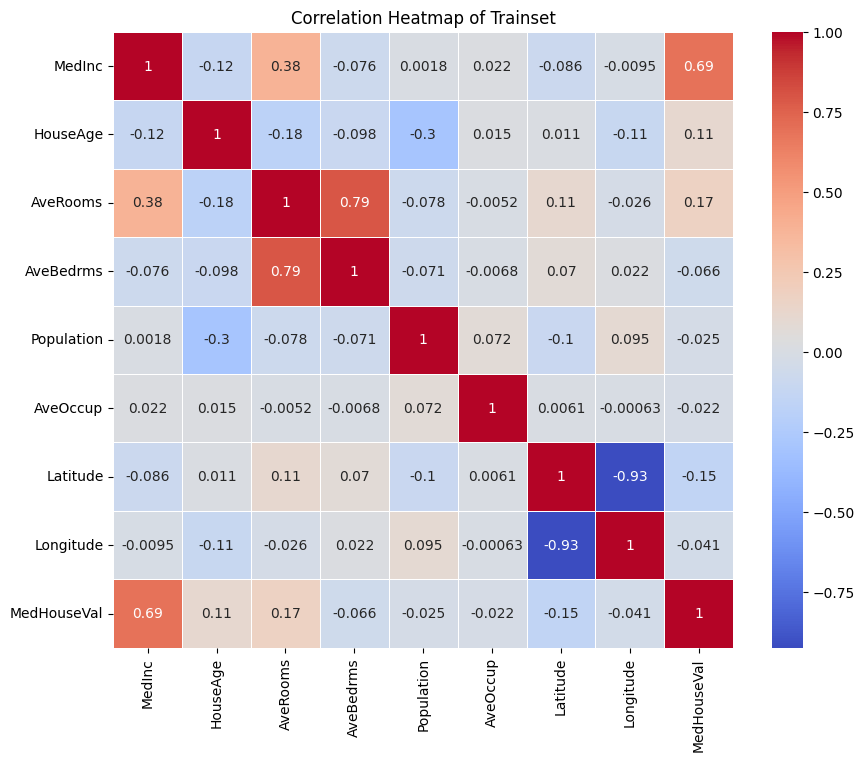

In [5]:
# יצירת מטריצת קורלציה בין המשתנים
plt.figure(figsize=(10,8))
sns.heatmap(trainset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Trainset')
plt.show()


In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

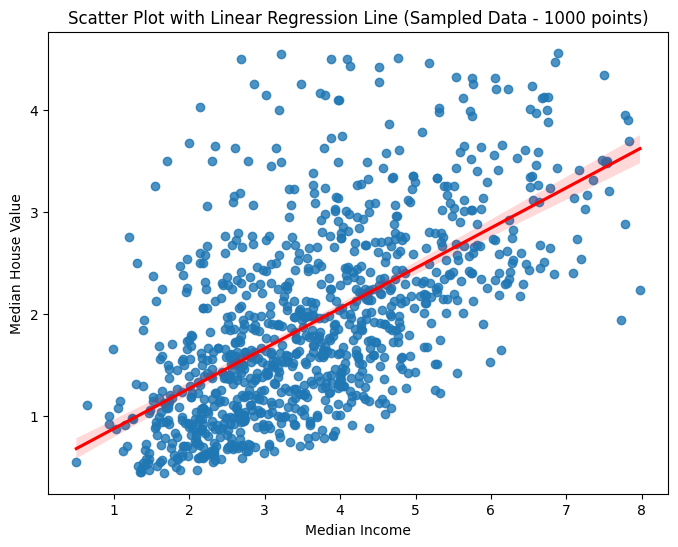

In [7]:
trainset_cleaned = remove_outliers(trainset, 'MedInc')
trainset_cleaned = remove_outliers(trainset_cleaned, 'MedHouseVal')
plt.figure(figsize=(8,6))

sampled_data = trainset_cleaned.sample(n=1000)
sns.regplot(x=sampled_data['MedInc'], y=sampled_data['MedHouseVal'], line_kws={"color":"red"})
plt.title('Scatter Plot with Linear Regression Line (Sampled Data - 1000 points)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

### חלק 3 - ניסויים ובחירת המודל הטוב ביותר

בשלב זה התחלנו לבצע ניסויים בעזרת מספר מודלים ללמידת רגרסיה על נתוני האימון:

1.  **שימוש ב-5-Fold Cross-Validation**: חילקנו את הדאטה ל-5 קיפולים כדי להעריך את המודלים בצורה נכונה ומאוזנת.
2.  **מודלים שנבדקו**:
    -   **Random Forest Regressor**: מודל המבוסס על עצי החלטה מרובים ומשתמש בתוצאה הממוצעת.
    -   **K-Nearest Neighbors (KNN)**: מודל המבוסס על קירבת נקודות על סמך מספר שכנים.
3.  **Grid Search**: בדקנו קומבינציות שונות של היפר-פרמטרים לכל אחד מהמודלים, ובחרנו את הקומבינציה שהביאה לציון הכי גבוה במדד R^2 על פי Cross-Validation.

בסופו של דבר, המודל עם הביצועים הטובים ביותר היה **Random Forest Regressor** עם R^2 של כ-0.80 על סט האימון.

In [13]:
X_train = trainset.drop('MedHouseVal', axis=1)
y_train = trainset['MedHouseVal']  # 

X_train_cleaned = trainset_cleaned.drop('MedHouseVal', axis=1)
y_train_cleaned = trainset_cleaned['MedHouseVal']

results_summary = pd.DataFrame(columns=['Model', 'Best Params','Best R² Score'])

In [14]:
def evaluate(model_grid,X_train, y_train,model_details):
    
    model_grid.fit(X_train, y_train)
    
    print(model_details)
    print(f"Best parameters found: {model_grid.best_params_}")
    print(f"Best cross-validation score: {model_grid.best_score_}")

    results_df = pd.DataFrame(model_grid.cv_results_)
    display(results_df[['params', 'mean_test_score', 'std_test_score']])

    result = {
        'Model': model_details,
        'Best Params': model_grid.best_params_,
        'Best R² Score': model_grid.best_score_
    }
    
    return result


In [15]:
# מודל 1: Random Forest Regressor

rf_pipeline = Pipeline([('scaler',StandardScaler()),('regressor', RandomForestRegressor())])

rf_params = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='r2', n_jobs=3)


In [16]:
# מודל 2: K-Nearest Neighbors

knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='r2', n_jobs=2)


In [17]:
# Running Random Forest with cleaned dataset

result = evaluate(rf_grid,X_train_cleaned, y_train_cleaned,'Random Forest - Cleaned Dataset')

results_summary.loc[len(results_summary)] = result


# Running Random Forest with original dataset

result = evaluate(rf_grid,X_train, y_train,'Random Forest - Original Dataset')

results_summary.loc[len(results_summary)] = result


Random Forest - Cleaned Dataset
Best parameters found: {'regressor__max_depth': 20, 'regressor__n_estimators': 200}
Best cross-validation score: 0.7644094678878073


,params,mean_test_score,std_test_score
0,"{'regressor__max_depth': 10, 'regressor__n_estimators': 100}",0.732764,0.010434
1,"{'regressor__max_depth': 10, 'regressor__n_estimators': 200}",0.734805,0.011694
2,"{'regressor__max_depth': 20, 'regressor__n_estimators': 100}",0.762763,0.010716
3,"{'regressor__max_depth': 20, 'regressor__n_estimators': 200}",0.764409,0.009799
4,"{'regressor__max_depth': None, 'regressor__n_estimators': 100}",0.761611,0.011155
5,"{'regressor__max_depth': None, 'regressor__n_estimators': 200}",0.762992,0.009956


Random Forest - Original Dataset
Best parameters found: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Best cross-validation score: 0.8001423028194405


,params,mean_test_score,std_test_score
0,"{'regressor__max_depth': 10, 'regressor__n_estimators': 100}",0.774397,0.012505
1,"{'regressor__max_depth': 10, 'regressor__n_estimators': 200}",0.774742,0.012065
2,"{'regressor__max_depth': 20, 'regressor__n_estimators': 100}",0.798436,0.010311
3,"{'regressor__max_depth': 20, 'regressor__n_estimators': 200}",0.799401,0.010075
4,"{'regressor__max_depth': None, 'regressor__n_estimators': 100}",0.798491,0.009990
5,"{'regressor__max_depth': None, 'regressor__n_estimators': 200}",0.800142,0.010375


In [18]:
# Running KNN with cleaned dataset

result = evaluate(knn_grid,X_train_cleaned, y_train_cleaned,'K-Nearest Neighbors - Cleaned Dataset')

results_summary.loc[len(results_summary)] = result


# Running KNN with original dataset

result = evaluate(knn_grid,X_train, y_train,'K-Nearest Neighbors - Original Dataset')

results_summary.loc[len(results_summary)] = result


K-Nearest Neighbors - Cleaned Dataset
Best parameters found: {'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Best cross-validation score: 0.646885054194993


,params,mean_test_score,std_test_score
0,"{'knn__n_neighbors': 3, 'knn__weights': 'uniform'}",0.599621,0.019615
1,"{'knn__n_neighbors': 3, 'knn__weights': 'distance'}",0.602608,0.019889
2,"{'knn__n_neighbors': 5, 'knn__weights': 'uniform'}",0.625338,0.018304
3,"{'knn__n_neighbors': 5, 'knn__weights': 'distance'}",0.629767,0.018374
4,"{'knn__n_neighbors': 7, 'knn__weights': 'uniform'}",0.636420,0.017672
5,"{'knn__n_neighbors': 7, 'knn__weights': 'distance'}",0.641329,0.017640
6,"{'knn__n_neighbors': 9, 'knn__weights': 'uniform'}",0.639315,0.016271
7,"{'knn__n_neighbors': 9, 'knn__weights': 'distance'}",0.644680,0.016478
8,"{'knn__n_neighbors': 11, 'knn__weights': 'uniform'}",0.641083,0.017295
9,"{'knn__n_neighbors': 11, 'knn__weights': 'distance'}",0.646885,0.017257


K-Nearest Neighbors - Original Dataset
Best parameters found: {'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Best cross-validation score: 0.6850508928226896


,params,mean_test_score,std_test_score
0,"{'knn__n_neighbors': 3, 'knn__weights': 'uniform'}",0.644660,0.017643
1,"{'knn__n_neighbors': 3, 'knn__weights': 'distance'}",0.646886,0.017289
2,"{'knn__n_neighbors': 5, 'knn__weights': 'uniform'}",0.669318,0.018266
3,"{'knn__n_neighbors': 5, 'knn__weights': 'distance'}",0.672597,0.018253
4,"{'knn__n_neighbors': 7, 'knn__weights': 'uniform'}",0.676310,0.017400
5,"{'knn__n_neighbors': 7, 'knn__weights': 'distance'}",0.680549,0.017491
6,"{'knn__n_neighbors': 9, 'knn__weights': 'uniform'}",0.679726,0.017810
7,"{'knn__n_neighbors': 9, 'knn__weights': 'distance'}",0.684283,0.017824
8,"{'knn__n_neighbors': 11, 'knn__weights': 'uniform'}",0.680066,0.017195
9,"{'knn__n_neighbors': 11, 'knn__weights': 'distance'}",0.685051,0.017362


In [19]:
# הצגת התוצאות
results_summary


,Model,Best Params,Best R² Score
0,Random Forest - Cleaned Dataset,"{'regressor__max_depth': 20, 'regressor__n_estimators': 200}",0.764409
1,Random Forest - Original Dataset,"{'regressor__max_depth': None, 'regressor__n_estimators': 200}",0.800142
2,K-Nearest Neighbors - Cleaned Dataset,"{'knn__n_neighbors': 11, 'knn__weights': 'distance'}",0.646885
3,K-Nearest Neighbors - Original Dataset,"{'knn__n_neighbors': 11, 'knn__weights': 'distance'}",0.685051


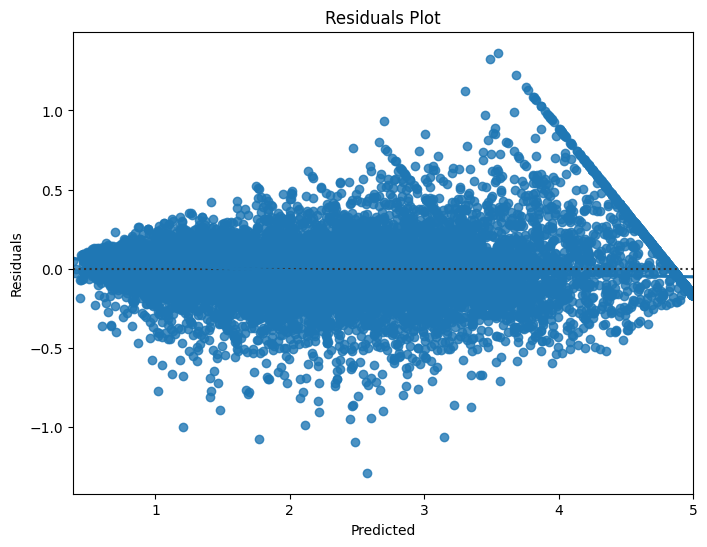

In [20]:
y_pred = rf_grid.predict(X_train)
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=y_train,lowess=True)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

### חלק 4 - אימון סופי עם המודל הטוב ביותר

בשלב זה, לאחר שבחרנו את המודל הטוב ביותר, אימנו אותו מחדש על כל נתוני האימון (train) תוך שימוש בהיפר-פרמטרים שנבחרו מהניסויים. המטרה היא למקסם את הביצועים של המודל על סט האימון המלא, כדי להשתמש בו לחיזוי על סט הבדיקה.

In [ ]:
# אימון מחדש של המודל הטוב ביותר - Random Forest Regressor
best_rf = RandomForestRegressor(n_estimators=200, max_depth=None)
best_rf.fit(X_train, y_train)

# אימות (Training Completed)
print("Model has been retrained on the full dataset with the best hyperparameters.")


## Part 5 - Apply on test and show model performance estimation

### חלק 5 - חיזוי ובדיקת איכות על סט הבדיקה

לאחר שהמודל הטוב ביותר אומן, ביצענו חיזוי על סט הבדיקה (**test**). מדדנו את איכות המודל על ידי חישוב מדד **R^2**, שמייצג את רמת ההסבר של המודל לשונות בנתוני המטרה. תוצאה של R^2=0.8263 על סט הבדיקה מעידה על כך שהמודל מסביר כ-82.63% מהשונות בנתונים שלא נראו במהלך האימון.

In [ ]:

testset = pd.read_csv('housing_test.csv')

X_test = testset.drop('MedHouseVal', axis=1)
y_test = testset['MedHouseVal']

y_pred = best_rf.predict(X_test)

r2_test = r2_score(y_test, y_pred)
print(f"R^2 on Test Set: {r2_test:.4f}")


In [ ]:
for i in range(5):
    print (f"Prediction: {y_pred[i]:.4f}, Actual: {y_test.values[i]}")

In [ ]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_test, y=y_pred,lowess=True)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()